In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "https://media.githubusercontent.com/media/sahrudaysherla/Zomato-Rating-Prediction/main/zomato.csv"
df = pd.read_csv(path)


In [54]:
df.drop(["name","cuisines","url","address","phone","dish_liked","reviews_list","listed_in(city)","menu_item"],axis=1, inplace=True)


We have in total 10 columns after dropping 7 redundent columns and they are as follows

 1.   online_order                 35011    object -> categorical, nominal, Dichotomous
 2.   book_table                   35011    object -> categorical, nominal, Dichotomous
 3.   rate                         35011    object -> categorical, ordinal
 4.   votes                        35011    int64  -> numerical, discrete
 5.   location                     34997    object -> categorical, nominal, polytomous
 6.   rest_type                    34855    object -> categorical, nominal, polytomous
 7.   approx_cost(for two people)  34790    object
 8.   listed_in(type)              35011    object -> categorical, nominal, polytomous

In [55]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.isnull().sum()
features_NaN = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_NaN:
    print(f"{feature} {np.round(df[feature].isnull().mean()*100, 4)} % missing valiues")
type(features_NaN)

rate 7.0443 % missing valiues
location 0.0121 % missing valiues
rest_type 0.4408 % missing valiues
approx_cost(for two people) 0.6311 % missing valiues


list

## Handling Missing Values

In [56]:
df['online_order'].replace({'Yes':1, 'No':0}, inplace=True)
df['book_table'].replace({'Yes':1, 'No':0}, inplace=True)
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: str(x).replace(",",""))
#df['rate'] = df['rate'].str.split('/').str[0]
for feature in features_NaN:
    print(f"Mode of {feature} is {df[feature].mode()}")
df['location'] = df['location'].fillna('BTM')
df['rest_type'] = df['rest_type'].fillna('Quick Bites')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna('300')
df.isnull().sum()

Mode of rate is 0    nan
Name: rate, dtype: object
Mode of location is 0    BTM
Name: location, dtype: object
Mode of rest_type is 0    Quick Bites
Name: rest_type, dtype: object
Mode of approx_cost(for two people) is 0    400
Name: approx_cost(for two people), dtype: object


online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [57]:
for feature in df.columns:
    with open("output.txt", "a") as f:
        print(f"Printing Unique values of {feature} in output.txt")
        print(f" {feature} has Unique values : {df[feature].unique()} \n", file=f)

Printing Unique values of online_order in output.txt
Printing Unique values of book_table in output.txt
Printing Unique values of rate in output.txt
Printing Unique values of votes in output.txt
Printing Unique values of location in output.txt
Printing Unique values of rest_type in output.txt
Printing Unique values of approx_cost(for two people) in output.txt
Printing Unique values of listed_in(type) in output.txt


1. On taking look at output.txt it was found that rate has 2 wrong values i.e 'nan', '-' and 'NEW' 

need to replace them

In [58]:
df['rate'] = df['rate'].replace(to_replace='-',value =0)
df['rate'] = df['rate'].replace(to_replace='nan',value =0)
df['rate'] = df['rate'].replace(to_replace='NEW',value =0)
df['rate'].unique()
df.rename(columns={'approx_cost(for two people)': 'approx_price'}, inplace=True)
df['approx_price'] = df['approx_price'].replace(to_replace='nan', value='300')

### Changing Types and Seperating Features

In [59]:
df['online_order'] = df['online_order'].astype(int)
df['book_table'] = df['book_table'].astype(int)
df['rate'] = df['rate'].astype(float)
df['approx_price'] = df['approx_price'].astype(int)
numerical_features = [feature for feature in  df.columns if df[feature].dtypes != 'object']
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
numerical_features, categorical_features
df.describe()

,online_order,book_table,rate,votes,approx_price
count,33119.000000,33119.000000,33119.000000,33119.000000,33119.000000
mean,0.614300,0.162656,3.351834,382.436366,607.309611
std,0.486768,0.369057,1.207483,961.820818,468.165101
min,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,0.000000,3.300000,14.500000,300.000000
50%,1.000000,0.000000,3.700000,69.000000,500.000000
75%,1.000000,0.000000,4.000000,297.000000,750.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


### Visualizations

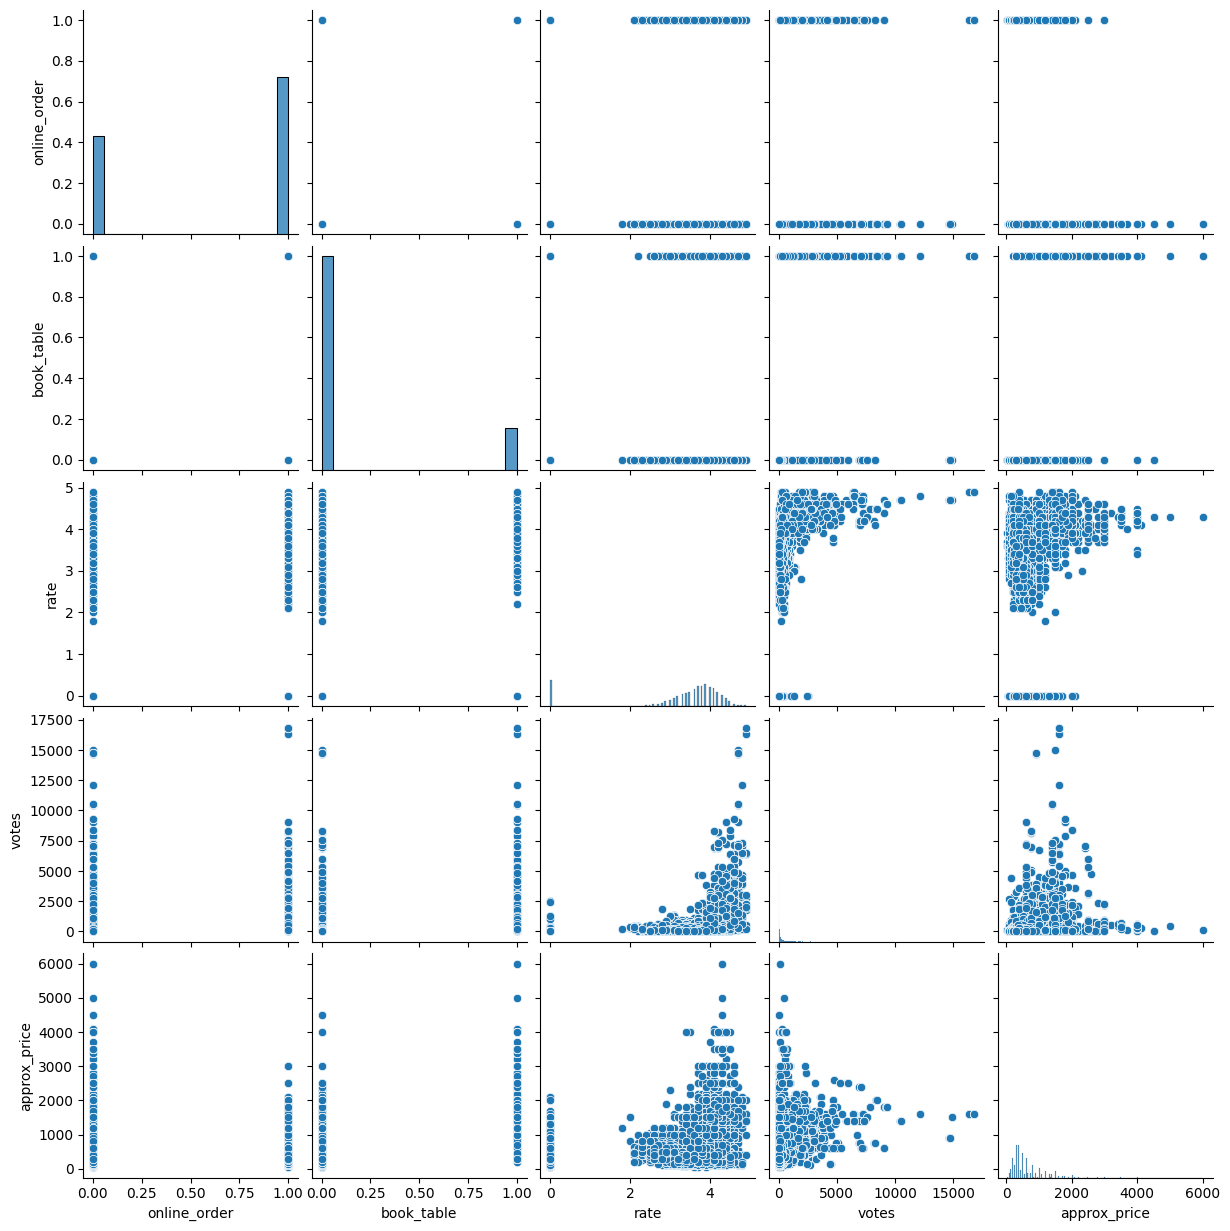

In [60]:
import seaborn as sns
sns.pairplot(df)

- most of the rating lies around 4
- there are High votes for the High rating 
- rate is high when approx cost is around 2000
- votes are high for the approx cost for two is around 2000

/tmp/ipykernel_3388/49094304.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method='pearson')
/tmp/ipykernel_3388/49094304.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = df.skew()


array([[<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'book_table'}>],
       [<AxesSubplot:title={'center':'rate'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'approx_price'}>, <AxesSubplot:>]],
      dtype=object)

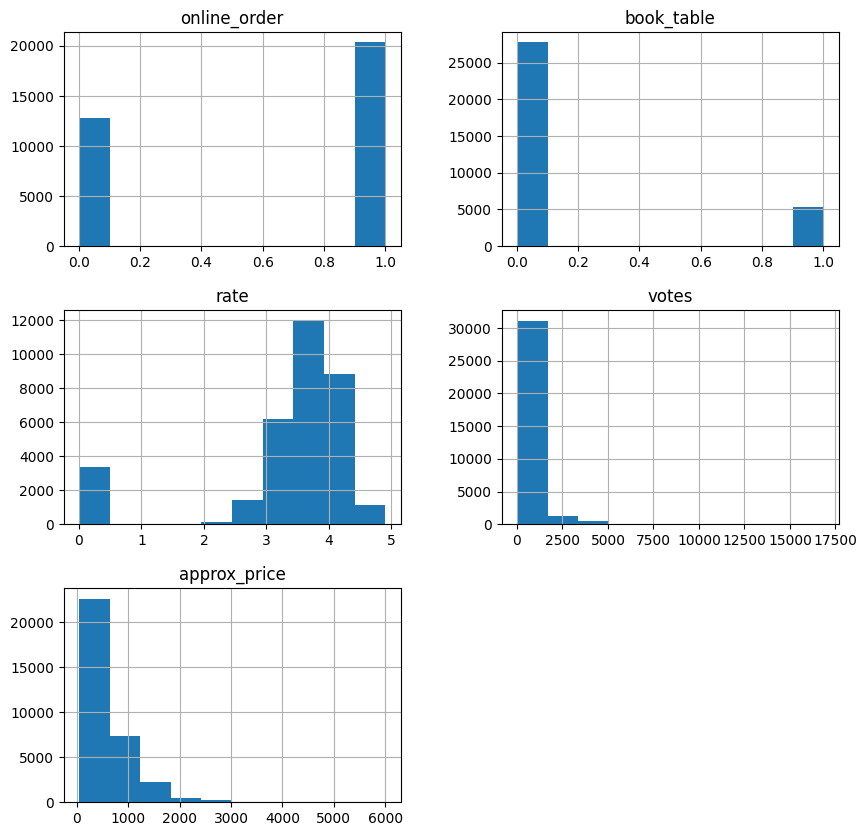

In [61]:
correlations = df.corr(method='pearson')
skew = df.skew()
hist = df.hist(figsize=(10,10))
hist

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

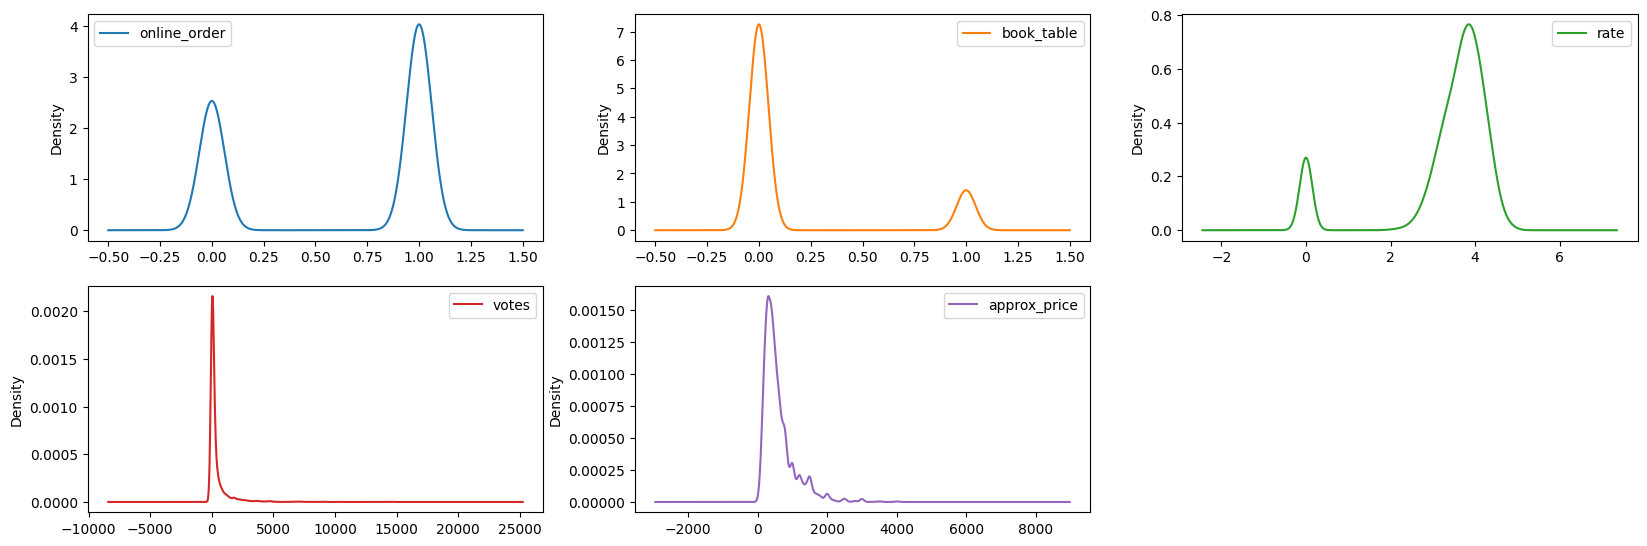

In [62]:

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20,10))

<AxesSubplot:>

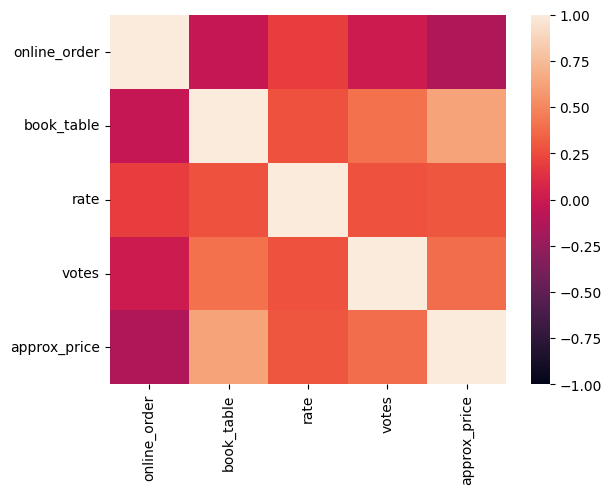

In [63]:
sns.heatmap(correlations, vmin=-1, vmax=1)

### Average Rating according to the location

Avg rating when location Banashankari is rate    3.178598
dtype: float64
Avg rating when location Basavanagudi is rate    3.272707
dtype: float64
Avg rating when location Mysore Road is rate    2.785714
dtype: float64
Avg rating when location Jayanagar is rate    3.512861
dtype: float64
Avg rating when location Kumaraswamy Layout is rate    3.0
dtype: float64
Avg rating when location Rajarajeshwari Nagar is rate    3.85
dtype: float64
Avg rating when location Vijay Nagar is rate    2.996104
dtype: float64
Avg rating when location Uttarahalli is rate    2.633333
dtype: float64
Avg rating when location JP Nagar is rate    3.252049
dtype: float64
Avg rating when location South Bangalore is rate    2.866667
dtype: float64
Avg rating when location City Market is rate    2.738889
dtype: float64
Avg rating when location Nagarbhavi is rate    0.85
dtype: float64
Avg rating when location Bannerghatta Road is rate    3.098165
dtype: float64
Avg rating when location BTM is rate    3.339506
dtype:

<AxesSubplot:>

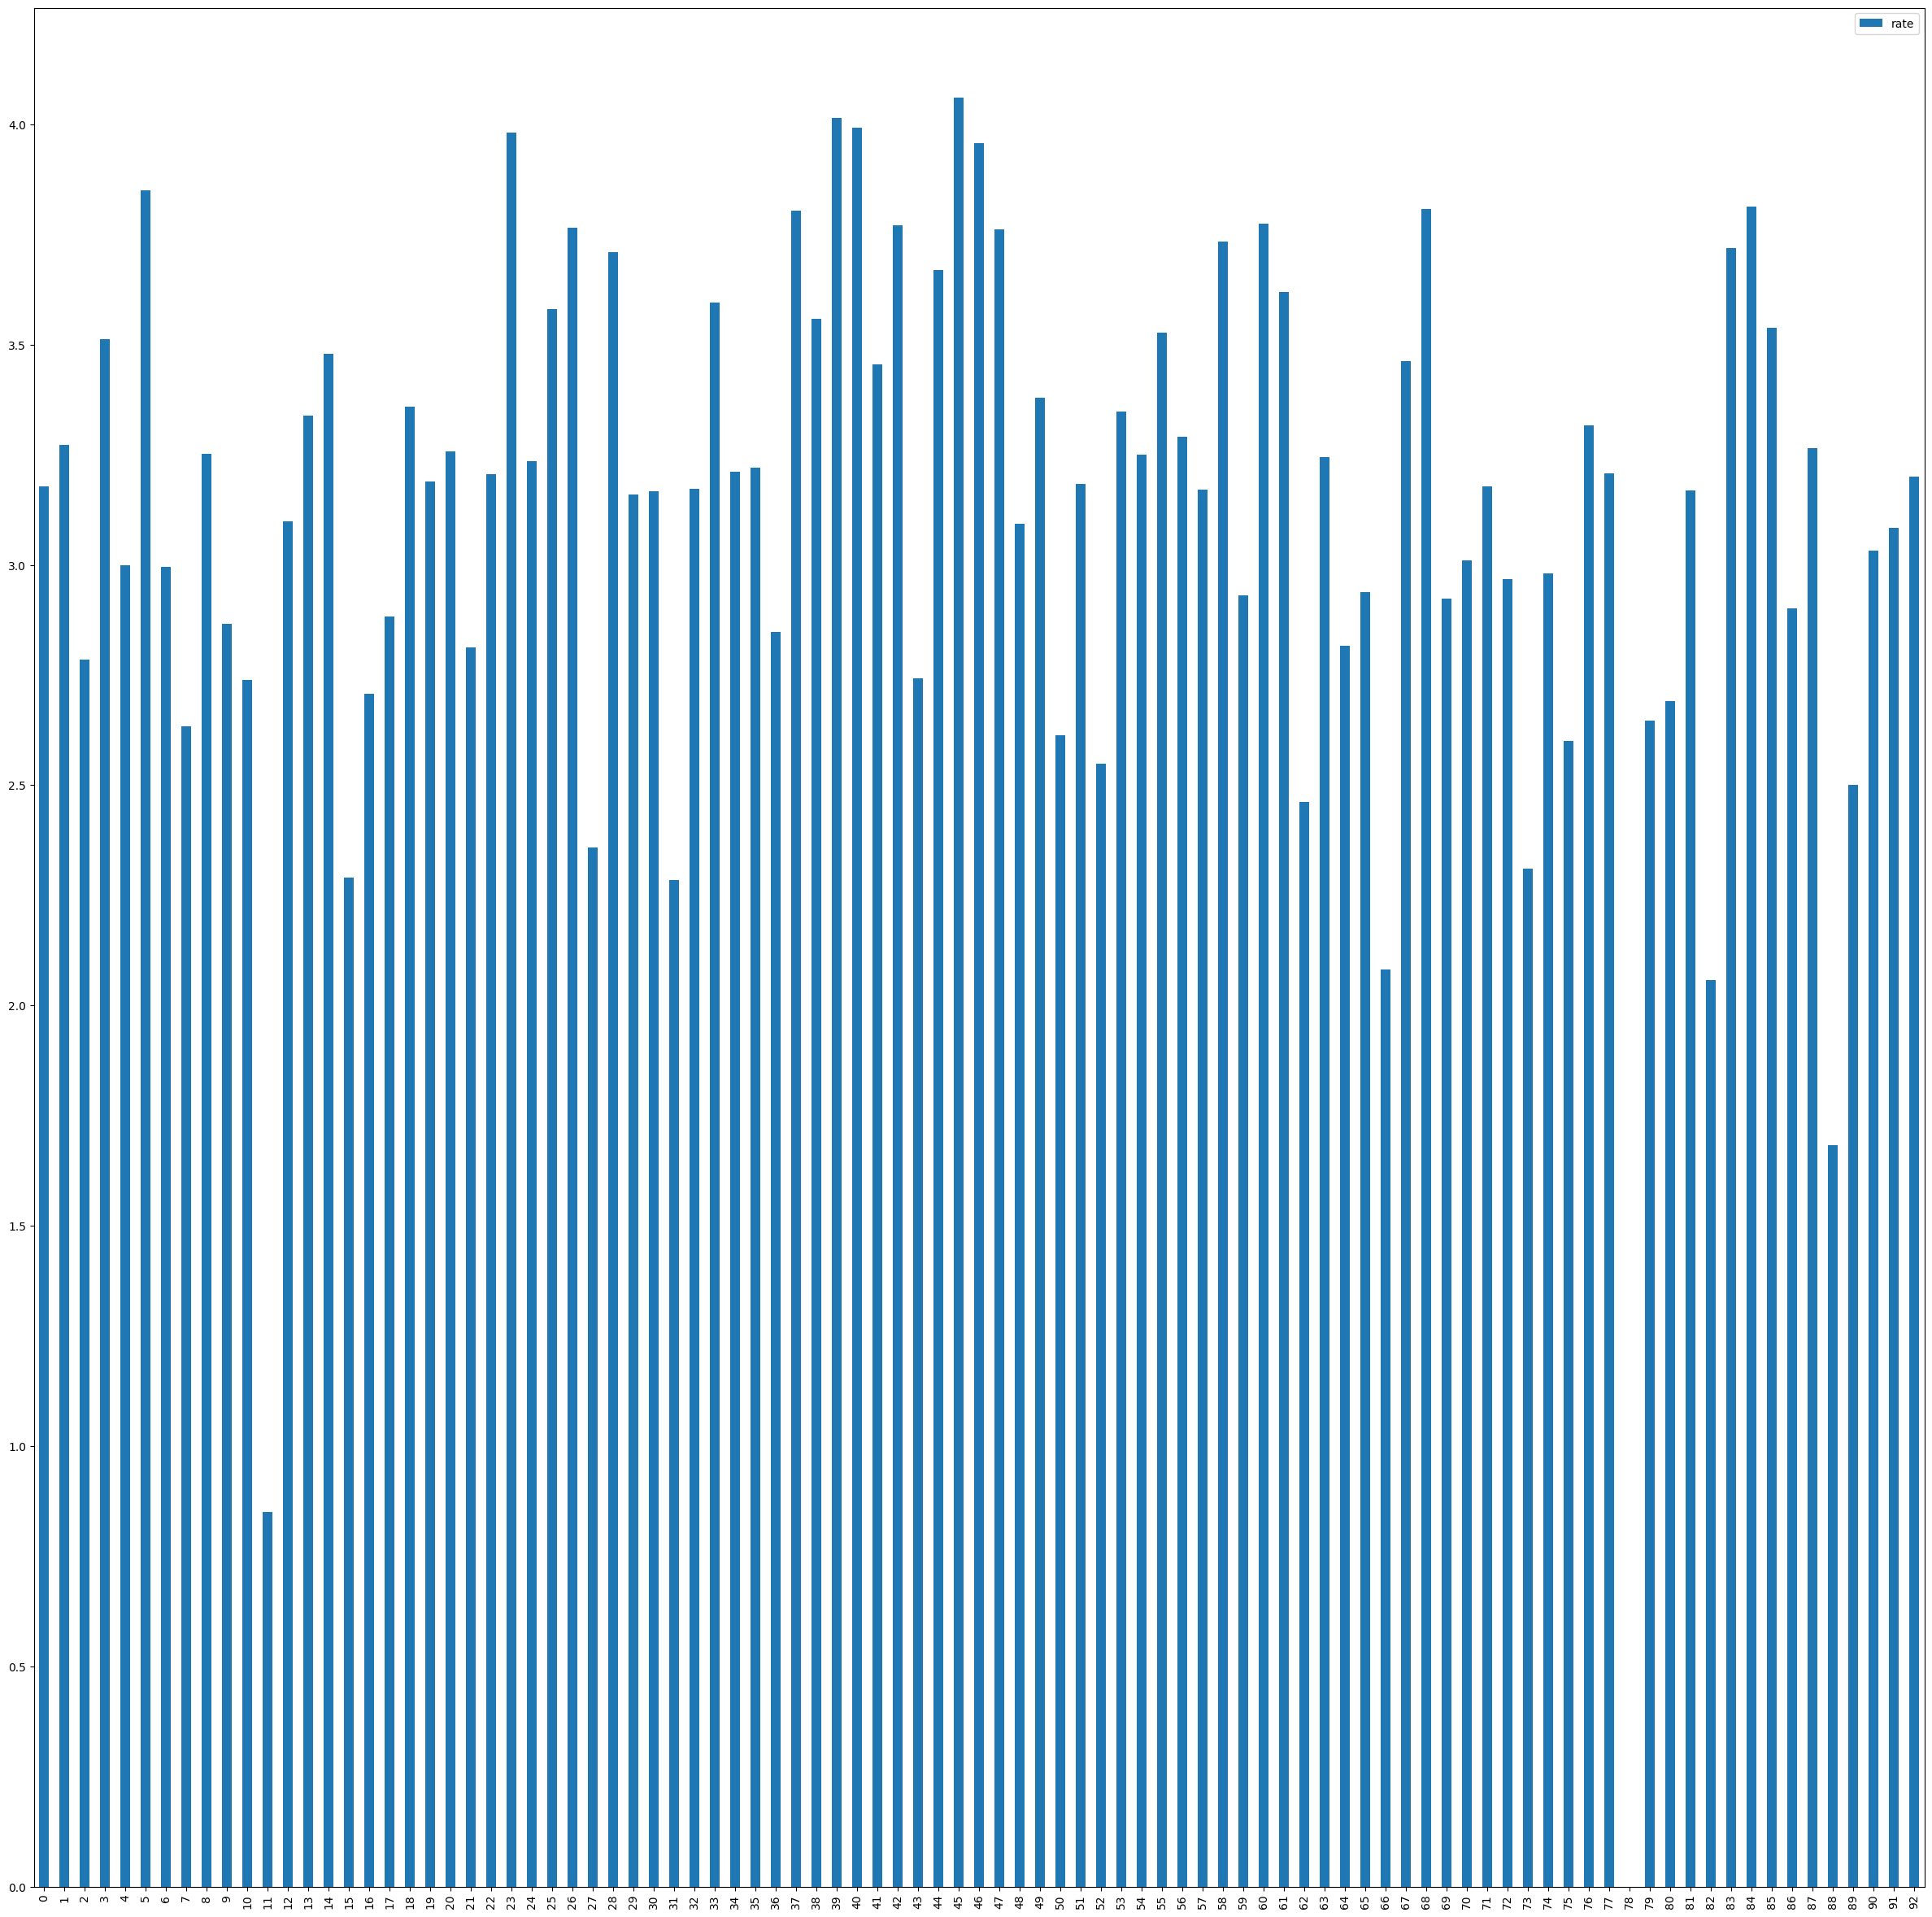

In [186]:

unique_locations = df['location'].unique()
new_rating_location = []
for feature in unique_locations:
    rating_location = df[['location','rate']].query(f'location == "{feature}"')
    print(f"Avg rating when location {feature} is {rating_location[['rate']].mean()}")
    rating_location_mean = rating_location['rate'].mean()
    new_rating_location.append(rating_location_mean)

avg_locatin_rating = pd.DataFrame(list(zip(unique_locations,new_rating_location)),columns=['location',"rate"])
avg_locatin_rating.plot(kind='bar', figsize=(30,30))

### Average Rating based on restraunt type

Avg rating when rest_type Casual Dining is rate    3.596468
dtype: float64
Avg rating when rest_type Cafe, Casual Dining is rate    4.131111
dtype: float64
Avg rating when rest_type Quick Bites is rate    3.11125
dtype: float64
Avg rating when rest_type Casual Dining, Cafe is rate    4.213386
dtype: float64
Avg rating when rest_type Cafe is rate    3.648745
dtype: float64
Avg rating when rest_type Quick Bites, Cafe is rate    2.757576
dtype: float64
Avg rating when rest_type Cafe, Quick Bites is rate    3.270833
dtype: float64
Avg rating when rest_type Delivery is rate    2.787052
dtype: float64
Avg rating when rest_type Mess is rate    2.772781
dtype: float64
Avg rating when rest_type Dessert Parlor is rate    3.451523
dtype: float64
Avg rating when rest_type Bakery, Dessert Parlor is rate    3.328
dtype: float64
Avg rating when rest_type Pub is rate    3.948534
dtype: float64
Avg rating when rest_type Bakery is rate    2.59304
dtype: float64
Avg rating when rest_type Takeaway, Delive

<AxesSubplot:>

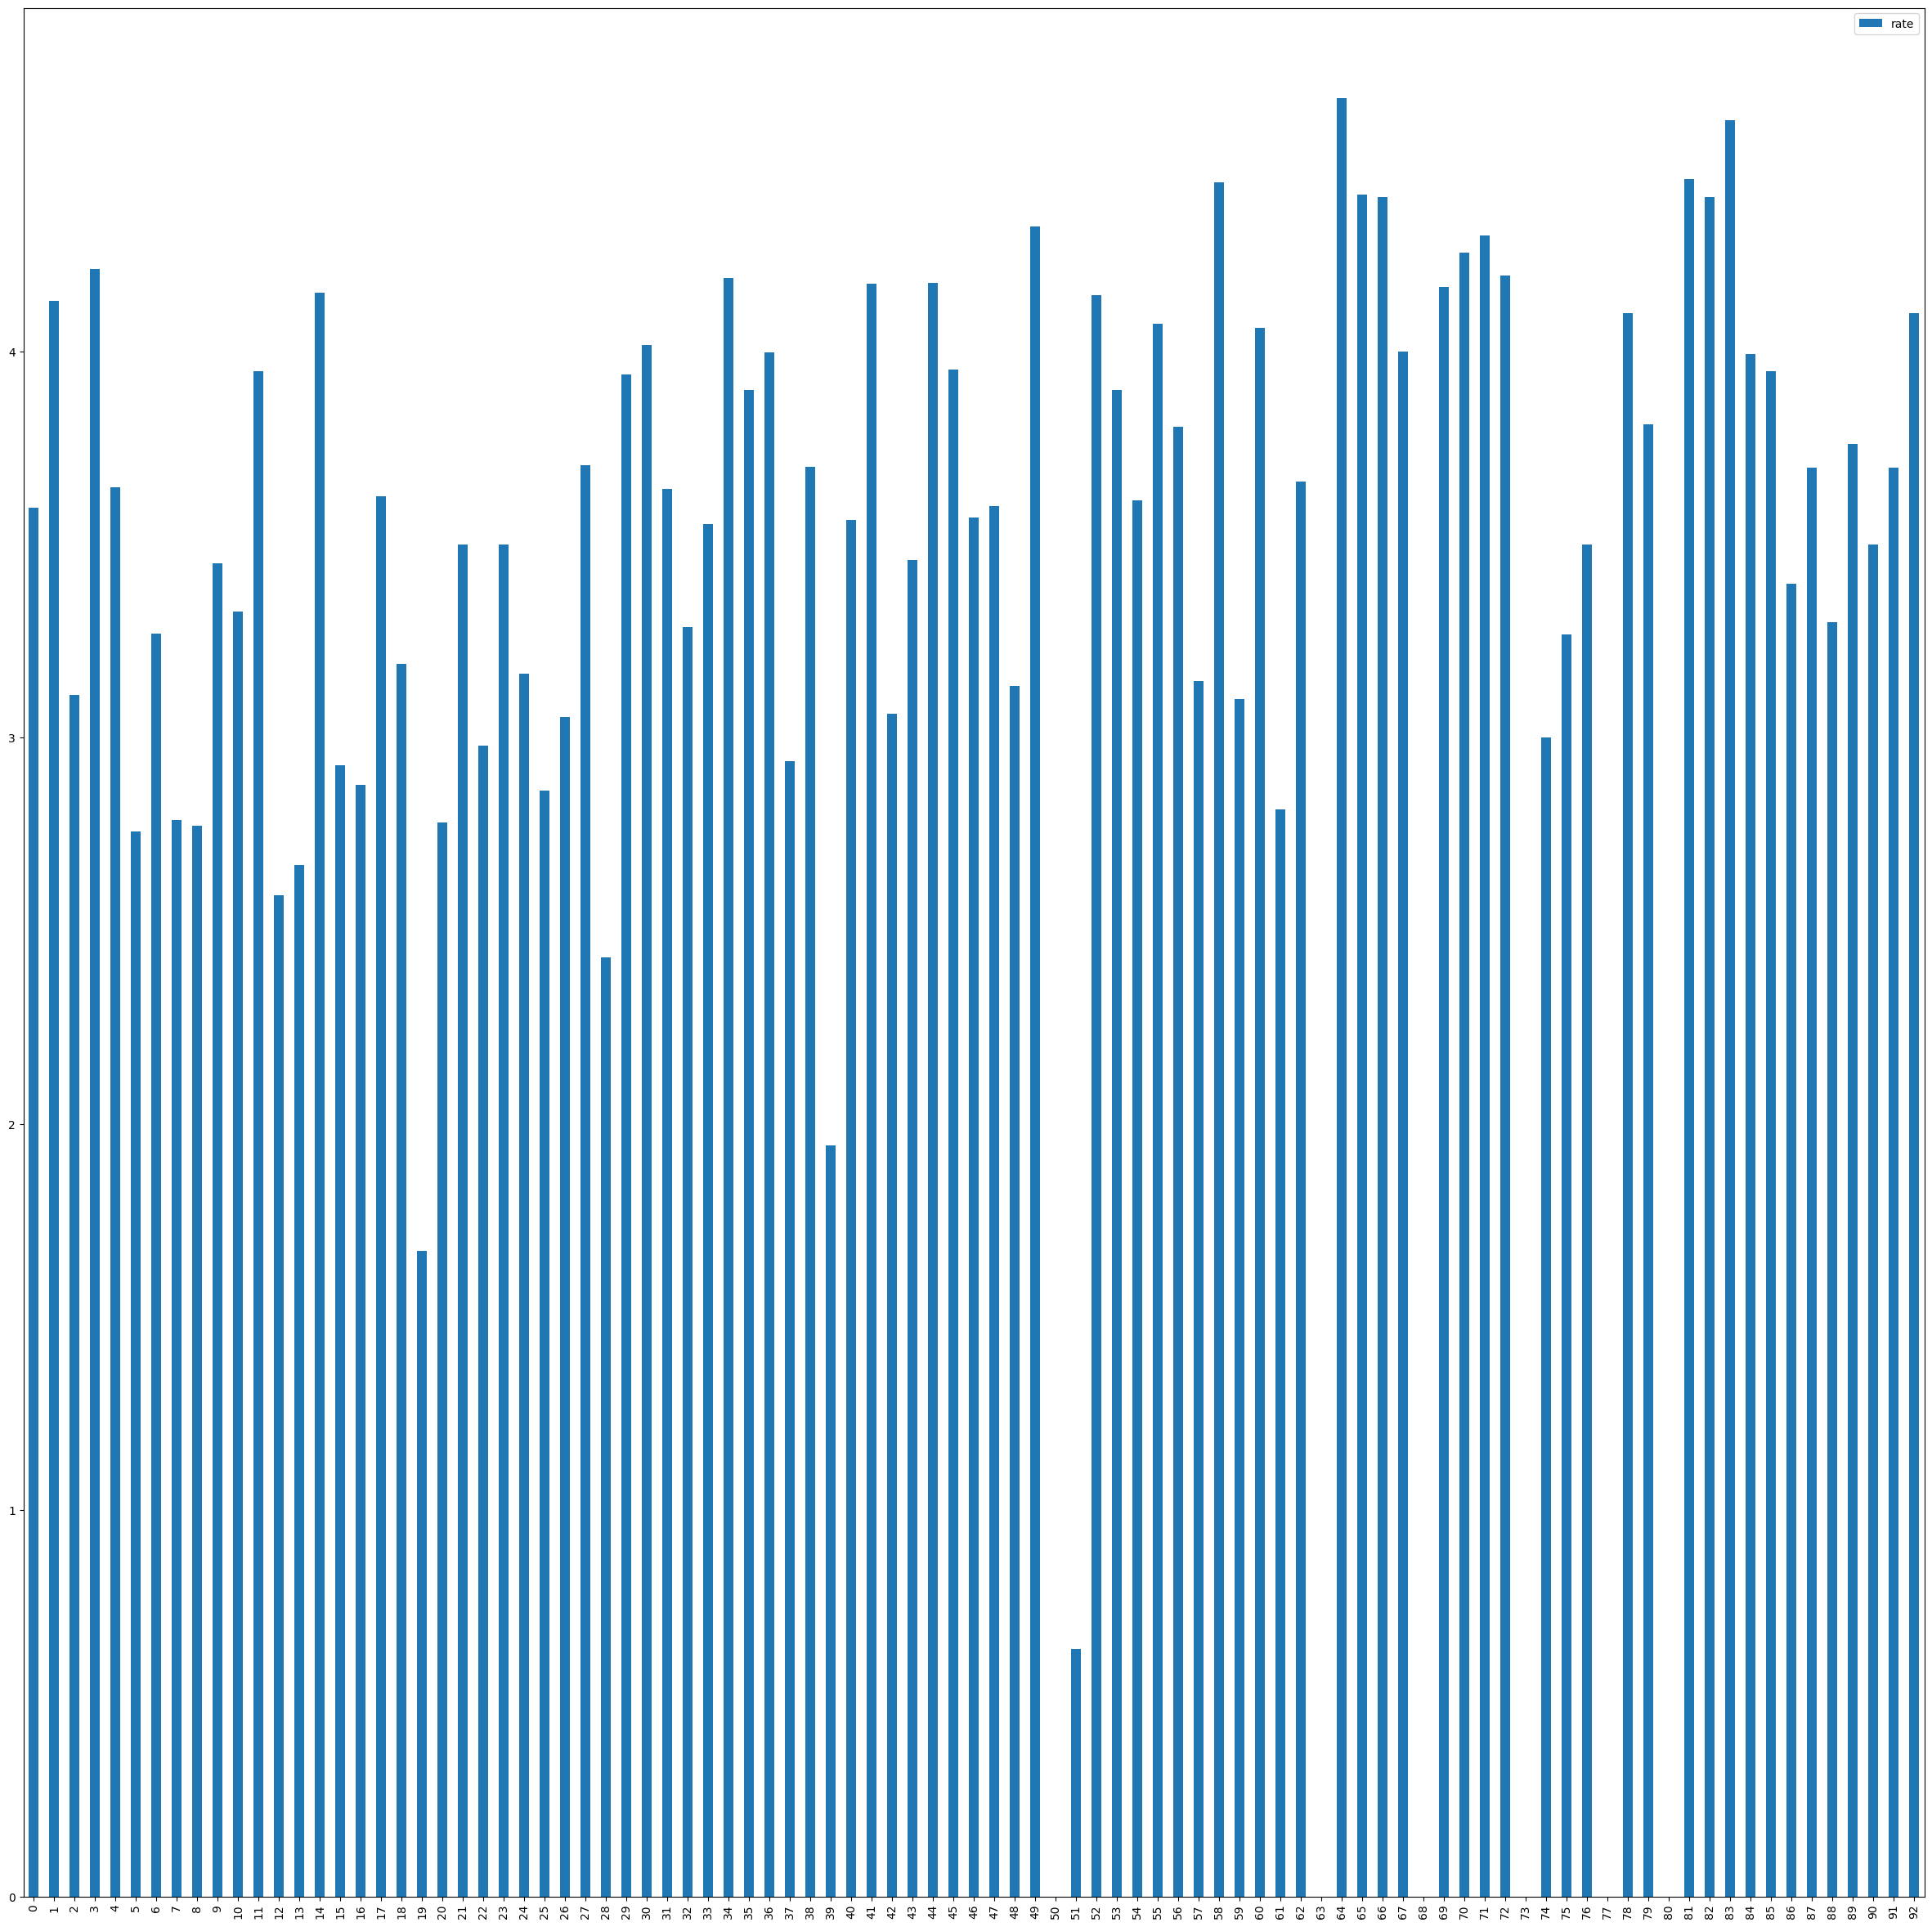

In [188]:
#df['listed_in(type)','rest_type']
unique_rest_type = df['rest_type'].unique()
new_rating_rest_type = []
for feature in unique_rest_type:
    rating_rest_type = df[['rest_type','rate']].query(f'rest_type == "{feature}"')
    print(f"Avg rating when rest_type {feature} is {rating_rest_type[['rate']].mean()}")
    rating_rest_type_mean = rating_rest_type['rate'].mean()
    new_rating_rest_type.append(rating_rest_type_mean)

avg_rest_type_rating = pd.DataFrame(list(zip(unique_rest_type,new_rating_rest_type)),columns=['rest_type',"rate"])
avg_rest_type_rating.plot(kind='bar', figsize=(30,30))

Avg rating when listed_in Buffet is rate    3.940119
dtype: float64
Avg rating when listed_in Cafes is rate    3.59284
dtype: float64
Avg rating when listed_in Delivery is rate    3.265755
dtype: float64
Avg rating when listed_in Desserts is rate    3.175513
dtype: float64
Avg rating when listed_in Dine-out is rate    3.366894
dtype: float64
Avg rating when listed_in Drinks & nightlife is rate    3.969095
dtype: float64
Avg rating when listed_in Pubs and bars is rate    3.860862
dtype: float64


<AxesSubplot:>

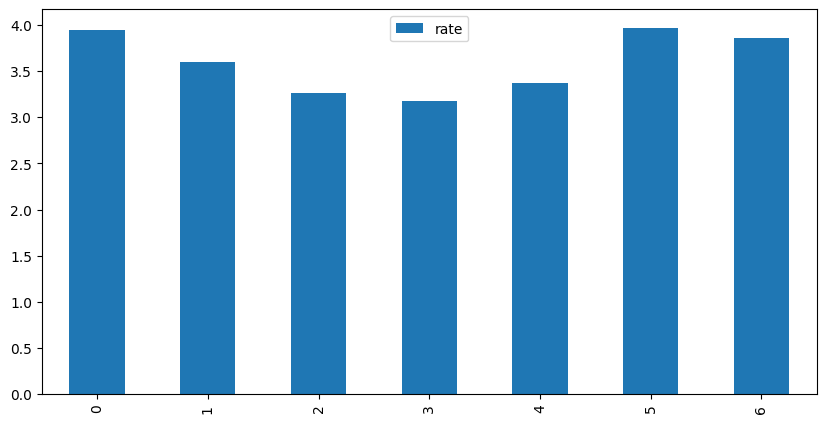

In [198]:
df.rename(columns={'listed_in(type)': 'listed_in'}, inplace=True)
unique_listed_in = df['listed_in'].unique()
new_rating_listed_in = []
for feature in unique_listed_in:
    rating_listed_in = df[['listed_in','rate']].query(f'listed_in == "{feature}"')
    print(f"Avg rating when listed_in {feature} is {rating_listed_in[['rate']].mean()}")
    rating_listed_in_mean = rating_listed_in['rate'].mean()
    new_rating_listed_in.append(rating_listed_in_mean)

avg_listed_in_rating = pd.DataFrame(list(zip(unique_listed_in,new_rating_listed_in)),columns=['listed_in',"rate"])
avg_listed_in_rating.plot(kind='bar', figsize=(10,5))

In [225]:
df.head()
new_rating_listed_in = pd.DataFrame(new_rating_listed_in)
new_rating_listed_in['new_rating_location'] = pd.DataFrame(new_rating_location)
new_rating_listed_in.rename(columns= {"0":"rating_rest_type"}, inplace=True)
new_rating_listed_in.corr(method='pearson')



,0,new_rating_location
0,1.000000,0.394791
new_rating_location,0.394791,1.000000
